In [1]:
from tqdm import tqdm
import numpy as np
from chelsaCLIP_dataset import ChelsaCLIPDataset

In [2]:
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
months = ["01"]
monthly_arrays = {}
for month in tqdm(months):
    monthly_arrays[month] = np.load("/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010_numpy/" + month + "_monthly_float16.npy")
point_to_coord_file = "/shares/wegner.ics.uzh/CHELSA/input/point_to_coord_train.npy"

100%|██████████| 1/1 [00:09<00:00,  9.10s/it]


In [3]:
mask = monthly_arrays["01"][0] > 30
print(mask.shape)
for i in range(11):
    monthly_arrays["01"][i][mask] = 0

(20880, 43200)


In [27]:
ds = ChelsaCLIPDataset(
        monthly_arrays=monthly_arrays,
        land_coordinates_file="/shares/wegner.ics.uzh/CHELSA/input/land_coordinates_train.npy",
        point_to_coord_file=point_to_coord_file,
        months=months)

150099789 [ 8756 12736] ; Upper left corner should be at: (11.029027373700018, -73.8626393134)


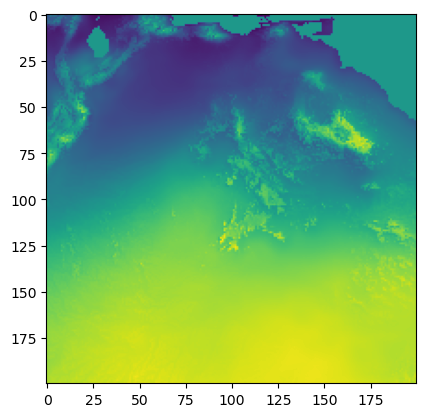

82036982 [ 4343 14723] ; Upper left corner should be at: (47.80402722660001, -57.3043060463)


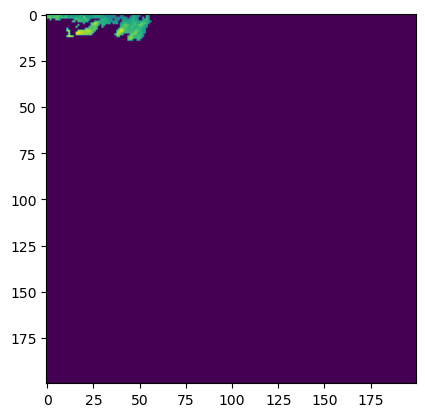

In [29]:
import random
import matplotlib.pyplot as plt
for i in range(2):
    idx = random.randint(0, len(ds))
    print(idx, ds.locs[idx], "; Upper left corner should be at:", (ds[idx][0][1],ds[idx][0][0]))
    pixel_y, pixel_x = ds.locs[idx]
    chelsa = ds.monthly_arrays["01"][:,pixel_y:pixel_y+2000:10, pixel_x:pixel_x+2000:10]
    plt.imshow(chelsa.astype("float")[1,:,:])
    plt.show()

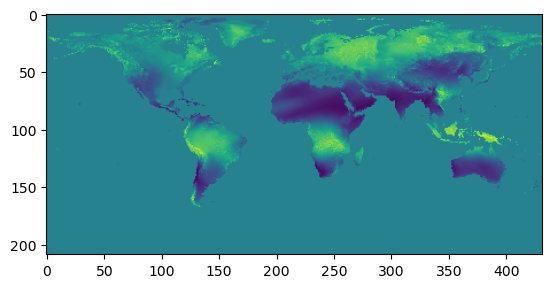

In [11]:
chelsa = ds.monthly_arrays["01"][:,::100, ::100]
plt.imshow(chelsa.astype("float")[1,:,:])
plt.show()

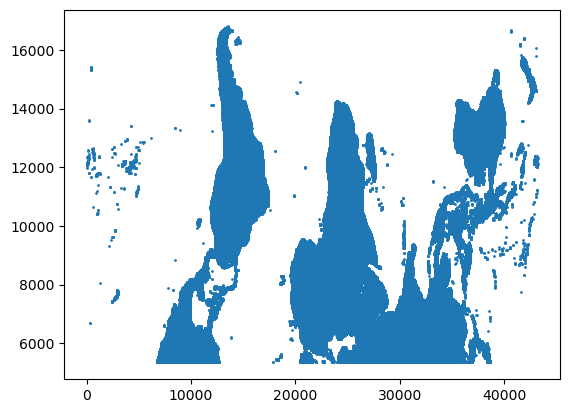

In [25]:
yx=ds.locs
plt.scatter(yx[-100000000::100,1],yx[-100000000::100,0],s=1)
plt.show()

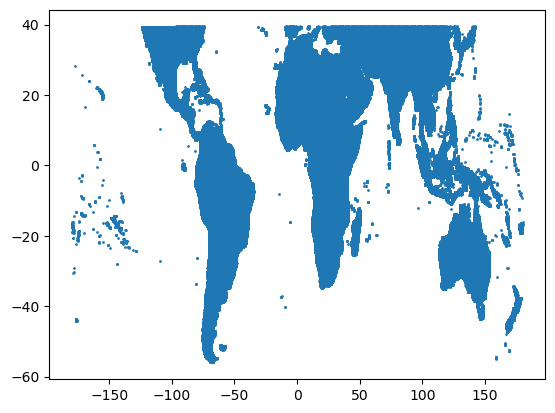

In [26]:
lonlat=ds.point_to_coord
plt.scatter(lonlat[-100000000::100,0],lonlat[-100000000::100,1],s=1)
plt.show()